In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import Button,Layout
import ipywidgets as widgets

In [23]:
import numpy as np

In [3]:
%matplotlib inline

In [4]:
from IPython.display import display
from IPython.display import clear_output
button = Button(description="Sample")

In [5]:
from scipy.stats import norm
import matplotlib.pyplot as plt


In [1]:
import pandas as pd
import sqlite3
import h5py
from scipy.stats import norm

In [2]:
h5py.__version__

'2.8.0'

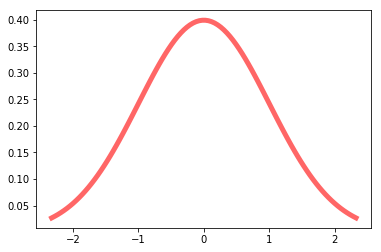

In [6]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')

In [18]:
r = widgets.FloatText(value=norm.rvs(size=1))

In [19]:
print(r.value)

0.278286150199


In [8]:
def on_button_clicked(b):
    r.value = norm.rvs(size=1)
    fig, ax = plt.subplots(1, 1)
    ax.hist(r.value, normed=True, histtype='stepfilled', alpha=0.2)
    ax.legend(loc='best', frameon=False)
    plt.show()



Button(description=u'Sample', style=ButtonStyle())

/Users/befeltingu/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


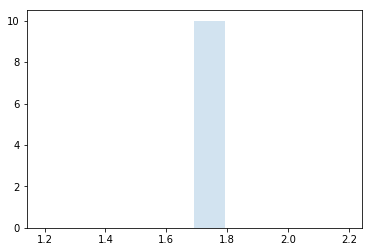

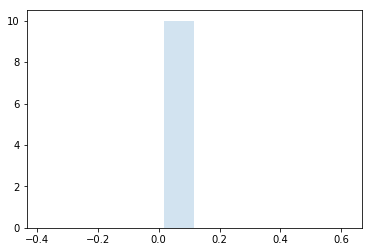

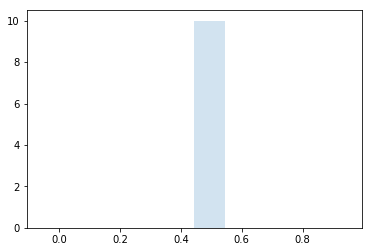

In [9]:
button.on_click(on_button_clicked)
display(button)

In [18]:
q = 'select * from LossTable'

conn = sqlite3.connect('/Users/befeltingu/RLResearch/Data/test_db')

db_df = pd.read_sql(q,conn)

In [19]:
db_df.head()

,test_id,model_name,inc,loss_value
0,0,test_model,0,1.364839
1,0,test_model,1,0.417197
2,0,test_model,2,-0.529181
3,0,test_model,3,0.047535
4,0,test_model,4,1.755843


In [14]:

def format_query(q):

    q = q.replace('\n',' ')

    q = ' '.join(q.split())

    return q

def execute_sql(db,q):

    conn = sqlite3.connect(db)

    c = conn.cursor()

    q = format_query(q)

    c.execute(q)

    conn.commit()

    conn.close()

In [21]:
delete_q = "delete from LossTable where 1 = 1"

execute_sql('/Users/befeltingu/RLResearch/Data/test_db',delete_q)


for i in range(100):

    y_norm = norm.rvs(loc=0, size=1)

    insert_q = "Insert into LossTable values(0,'test_model', {inc}, {loss_val})".format(inc=i,loss_val=y_norm[0])

    execute_sql('/Users/befeltingu/RLResearch/Data/test_db',insert_q)

In [24]:
a = np.zeros(7)
b = np.zeros(7)


In [49]:
with h5py.File('/Users/befeltingu/RLResearch/Data/test_numpy.h5', 'a') as hf:
    hf.create_dataset("array_1",  data=a)

IOError: Unable to create file (File exists)

In [7]:
with h5py.File('/Users/befeltingu/RLResearch/Data/test_numpy.h5', 'a',swmr_mode=True) as hf:
    hf.create_dataset("array_3",  data=np.zeros(8))

TypeError: 'swmr_mode' is an invalid keyword argument for this function

In [3]:
h5py_f = h5py.File('/Users/befeltingu/RLResearch/Data/test_numpy.h5', 'r',swmr=True)

In [4]:
h5py_f['array_3'][:]

array([0., 0., 0., 0., 0., 0., 0.])

In [57]:
h5py_f.close()

In [61]:
pd_hdf = pd.read_hdf('/Users/befeltingu/RLResearch/Data/test_numpy.h5','array_3')

TypeError: cannot create a storer if the object is not existing nor a value are passed

In [8]:
from tables import *

In [9]:
class LeverReward(IsDescription):
    lever_name = StringCol(16)
    average_reward = Float64Col()

In [17]:
h5file = open_file('/Users/befeltingu/RLResearch/Data/test_numpy.h5', mode="a", title="Test file")

In [11]:
group = h5file.create_group("/", 'reward', 'Lever Reward')

In [12]:
table = h5file.create_table(group, 'lever_reward', LeverReward, "Readout example")

In [18]:
lever_reward = table.row

In [19]:
lever_reward['lever_name'] = 'lever_1'
lever_reward['average_reward'] = 1
lever_reward.append()

In [21]:
h5file.flush()

In [22]:
h5file.close()

In [23]:
table.flush()

In [1]:
import time

In [3]:
time.sleep(0.5)

In [7]:
import h5py
import numpy as np
import time

from scipy.stats import norm

In [16]:
f = h5py.File('/Users/befeltingu/RLResearch/Data/test_loss.h5', 'w', libver='latest')
arr = norm.rvs(loc=0, size=1)
dset = f.create_dataset("data", chunks=(2,), maxshape=(None,), data=arr)
f.swmr_mode = True
# Now it is safe for the reader to open the swmr.h5 file
for i in range(150):
    new_shape = ((i+1) * len(arr), )
    dset.resize( new_shape )
    dset[i*len(arr):] = norm.rvs(loc=0, size=1)
    dset.flush()
    time.sleep(1)
    # Notify the reader process that new data has been written

In [15]:
f.close()

In [8]:
y_norm = norm.rvs(loc=0, size=1)

In [11]:
y_norm

array([-0.94057645])

In [17]:
f.create_dataset?

In [ ]:
q